In [6]:
import sys
from matplotlib import pyplot as plt


sys.path.append('../../../') #server per fare l'import di file in un'altra directory sullo stesso "livello"

from src.training.biasVariance.corssValidation_biasVariance import plot_training, plot_validation, plot_mean_and_std_validation, cross_validation_with_biasVariance
from src.neuralNetwork.function import IdentityFunction
from src.neuralNetwork.error import MeanSquaredError
from src.neuralNetwork.NeuralNetwork import Layer, NeuralNetwork
import numpy as np

In [7]:
target_inputs = np.matrix(np.random.randn(50, 2))
target_outputs = target_inputs*2

layer1 = Layer(num_neurons = 2, num_inputs = 2, activation_function = IdentityFunction())
neuralNetwork = NeuralNetwork([layer1], error=MeanSquaredError())

In [8]:
learning_rate = 0.001
regularization_term = 0
momentum_term = 0.5
epochs = 5

training_error_list, validation_error_list = cross_validation_with_biasVariance(
    target_inputs = target_inputs, target_outputs = target_outputs, k = 5,
    model = neuralNetwork, learning_rate=learning_rate, momentum_term=momentum_term,
    regularization_term=regularization_term, epochs=epochs)

Fold  0
Fold  1
Fold  2
Fold  3
Fold  4


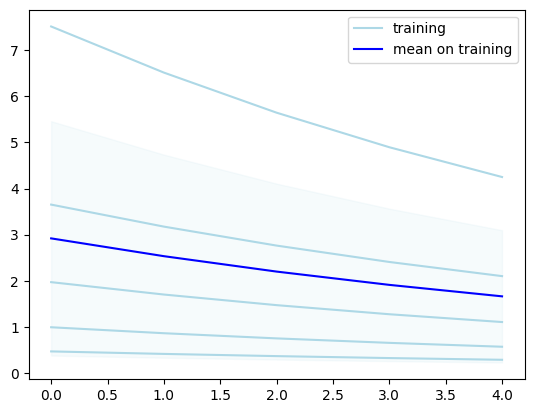

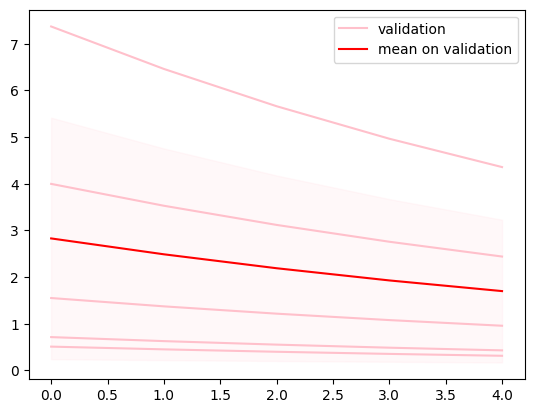

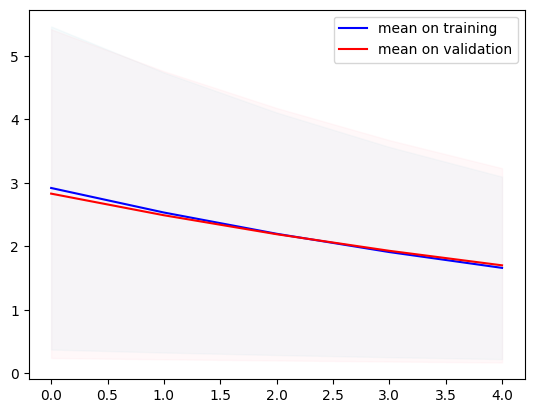

In [9]:
training_plot, mean_training_plot = plot_training(training_error_list=training_error_list)
plt.legend(handles=[training_plot, mean_training_plot])
plt.show()

validation_plot, mean_validation_plot = plot_validation(validation_error_list=validation_error_list)
plt.legend(handles=[validation_plot, mean_validation_plot])
plt.show()

plot_mean_and_std_validation(training_error_list=training_error_list,
                             validation_error_list=validation_error_list)
plt.legend()
plt.show()